In [1]:
from pywarpx import picmi
from icecream import ic
import yt
import unyt
from yt import derived_field
yt.enable_parallelism()

False

In [4]:
from parameters import *
from unyt import unyt_quantity

In [5]:
simulation_length_yt = unyt_quantity.from_astropy(simulation_length)

In [2]:
@yt.particle_filter(requires=["particle_position_x"], filtered_type="electron")
def filtered_electron(pfilter, data):
    filter = (data[(pfilter.filtered_type, "particle_position_x")] < simulation_length_yt)
    return filter

In [6]:
plotfile = 'diags/diag1/plt??????'
ts = yt.load(plotfile)

ds = ts[0]
ds.add_particle_filter("filtered_electron")
ad=  ds.all_data()

for field in ds.derived_field_list:
    if field[0] == "filtered_electron":
        print (field)
        fv = ad[field]
        if fv.size == 0: continue
        ic(field, fv.min(), fv.max(),fv.mean())


yt : [INFO     ] 2022-05-21 22:37:51,602 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-21 22:37:51,603 Parameters: domain_dimensions         = [160 128   1]
yt : [INFO     ] 2022-05-21 22:37:51,604 Parameters: domain_left_edge          = [     0.         -50917.67547762      0.        ]
yt : [INFO     ] 2022-05-21 22:37:51,604 Parameters: domain_right_edge         = [1.27294189e+05 5.09176755e+04 1.00000000e+00]
yt : [WARNING  ] 2022-05-21 22:37:52,694 The Derived Field ('filtered_electron', 'particle_spherical_velocity_phi') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('filtered_electron', 'particle_velocity_spherical_phi') instead.
yt : [WARNING  ] 2022-05-21 22:37:52,770 The Derived Field ('filtered_electron', 'particle_cylindrical_velocity_z') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('filtered_electron', 'particle_velocity_cylindrical_z') instead.
yt : [WARNING  ] 2022-05-21 22:37:52,927 The Derived Field ('

('filtered_electron', 'particle_cpu')


ic| field: ('filtered_electron', 'particle_cpu')
    fv.min(): unyt_quantity(0., '(dimensionless)')
    fv.max(): unyt_quantity(2., '(dimensionless)')
    fv.mean(): unyt_quantity(0.75, '(dimensionless)')


('filtered_electron', 'particle_id')


ic| field: ('filtered_electron', 'particle_id')
    fv.min(): unyt_quantity(636697., '(dimensionless)')
    fv.max(): unyt_quantity(2876676., '(dimensionless)')
    fv.mean(): unyt_quantity(1647629., '(dimensionless)')


('filtered_electron', 'particle_momentum_x')


ic| field: ('filtered_electron', 'particle_momentum_x')
    fv.min(): unyt_quantity(-8.73928881e-24, 'kg*m/s')
    fv.max(): unyt_quantity(7.0852909e-24, 'kg*m/s')
    fv.mean(): unyt_quantity(-3.67210417e-25, 'kg*m/s')


('filtered_electron', 'particle_momentum_y')


ic| field: ('filtered_electron', 'particle_momentum_y')
    fv.min(): unyt_quantity(-7.64029961e-24, 'kg*m/s')
    fv.max(): unyt_quantity(8.29684652e-24, 'kg*m/s')
    fv.mean(): unyt_quantity(-3.91861822e-27, 'kg*m/s')


('filtered_electron', 'particle_momentum_z')


ic| field: ('filtered_electron', 'particle_momentum_z')
    fv.min(): unyt_quantity(-8.6910625e-24, 'kg*m/s')
    fv.max(): unyt_quantity(7.65192688e-24, 'kg*m/s')
    fv.mean(): unyt_quantity(-2.95457937e-28, 'kg*m/s')
ic| field: ('filtered_electron', 'particle_position_x')
    fv.min(): unyt_quantity(47735.33542024, 'm')
    fv.max(): unyt_quantity(50917.63836251, 'm')
    fv.mean(): unyt_quantity(49326.42589234, 'm')


('filtered_electron', 'particle_position_x')
('filtered_electron', 'particle_position_y')


ic| field: ('filtered_electron', 'particle_position_y')
    fv.min(): unyt_quantity(-50917.59672297, 'm')
    fv.max(): unyt_quantity(50917.63520685, 'm')
    fv.mean(): unyt_quantity(-0.04526388, 'm')


('filtered_electron', 'particle_weight')


ic| field: ('filtered_electron', 'particle_weight')
    fv.min(): unyt_quantity(7.12794309e+09, '(dimensionless)')
    fv.max(): unyt_quantity(7.12794309e+09, '(dimensionless)')
    fv.mean(): unyt_quantity(7.12794309e+09, '(dimensionless)')


('filtered_electron', 'particle_weighting')


ic| field: ('filtered_electron', 'particle_weighting')
    fv.min(): unyt_quantity(7.12794309e+09, '(dimensionless)')
    fv.max(): unyt_quantity(7.12794309e+09, '(dimensionless)')
    fv.mean(): unyt_quantity(7.12794309e+09, '(dimensionless)')


yt : [INFO     ] 2022-05-21 22:38:05,116 xlim = 0.000000 127294.188694
yt : [INFO     ] 2022-05-21 22:38:05,117 ylim = -50917.675478 50917.675478
yt : [INFO     ] 2022-05-21 22:38:05,117 xlim = 0.000000 127294.188694
yt : [INFO     ] 2022-05-21 22:38:05,117 ylim = -50917.675478 50917.675478
yt : [INFO     ] 2022-05-21 22:38:05,119 Splatting (('filtered_electron', 'particle_weighting')) onto a 800 by 800 mesh using method 'ngp'



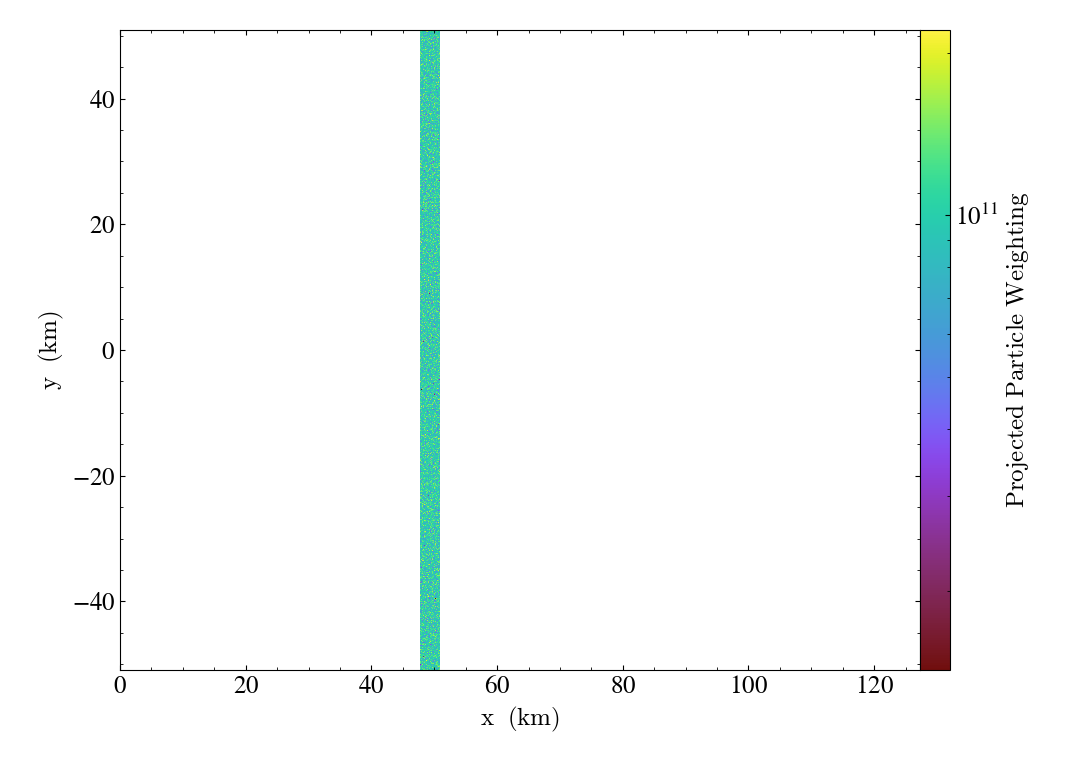

In [8]:
p = yt.ParticlePlot(
    ds,
    ("filtered_electron", "particle_position_x"),
    ("filtered_electron", "particle_position_y"),
    ("filtered_electron", "particle_weighting"),
    origin="native",
)
p.show()